In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('marketing_campaign.csv',sep=';')

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

In [5]:
# Dimension of the dataset
df.shape

(2240, 29)

In [6]:
# Check the structure of data using info command
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Data summary for all features in the data
df.describe(include='all')

ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2237           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1124            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      Recency     MntWines  ...  \
count   2240.000000  2240.000000        2240  2240.000000  2240.000000  ...   
unique          NaN          NaN         663          NaN          NaN  ...   
top             NaN          NaN  2012-08-31          NaN          NaN  ...   
freq            NaN          NaN          12          NaN          NaN  ...   
mean       0.444196     0.506250         NaN    49.109375   303.935714  ...   
std        0.538398     0.544538         NaN    28.962453   336.597393  ...   
min        0.000000     0.000000         NaN     0.000000     0.000000  ...   
25%        0.000000     0.000000         NaN    24.000000    23.750000  ...   
50%        0.000000     0.000000         NaN    49.000000   173.500000  ...   
75%        1.000000     1.000000         NaN    74.000000   504.250000  ...   
max        2.000000     2.000000         NaN    99.000000  1493.000000  ...   

        NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count         2240.000000   2240.000000   2240.000000   2240.000000   
unique                NaN           NaN           NaN           NaN   
top                   NaN           NaN           NaN           NaN   
freq                  NaN           NaN           NaN           NaN   
mean             5.316518      0.072768      0.074554      0.072768   
std              2.426645      0.259813      0.262728      0.259813   
min              0.000000      0.000000      0.000000      0.000000   
25%              3.000000      0.000000      0.000000      0.000000   
50%              6.000000      0.000000      0.000000      0.000000   
75%              7.000000      0.000000      0.000000      0.000000   
max             20.000000      1.000000      1.000000      1.000000   

        AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count    2240.000000   2240.000000  2240.000000         2240.0     2240.0   
unique           NaN           NaN          NaN            NaN        NaN   
top              NaN           NaN          NaN            NaN        NaN   
freq             NaN           NaN          NaN            NaN        NaN   
mean        0.064286      0.013393     0.009375            3.0       11.0   
std         0.245316      0.114976     0.096391            0.0        0.0   
min         0.000000      0.000000     0.000000            3.0       11.0   
25%         0.000000      0.000000     0.000000            3.0       11.0   
50%         0.000000      0.000000     0.000000            3.0       11.0   
75%         0.000000      0.000000     0.000000            3.0       11.0   
max         1.000000      1.000000     1.000000            3.0       11.0   

           Response  
count   2240.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.149107  
std        0.356274  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[11 rows x 29 columns]

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               3
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
df.Education.value_counts()

Graduation    1124
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [12]:
df['Education'].mode()[0]

'Graduation'

In [13]:
df['Education'].fillna(df['Education'].mode()[0],inplace=True)

In [14]:
df['Income'].fillna(df['Income'].median(),inplace=True)

In [15]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

<AxesSubplot:xlabel='Income'>

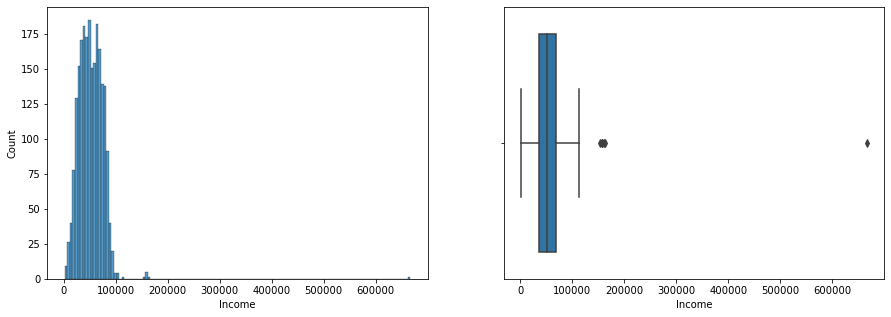

In [16]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x = 'Income', data=df, ax=axs[0])
sns.boxplot(x = 'Income', data=df, ax=axs[1])

<AxesSubplot:xlabel='count', ylabel='Response'>

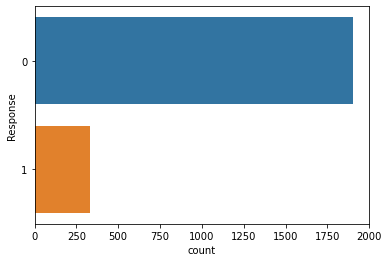

In [17]:
sns.countplot(y='Response',data=df)

In [18]:
df_num=df.select_dtypes(exclude='object')

In [19]:
num_list=df_num.columns
num_list

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [20]:
len(num_list)

26

In [21]:
df_cat=df.select_dtypes(include='object')

In [22]:
cat_list=df_cat.columns
cat_list

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

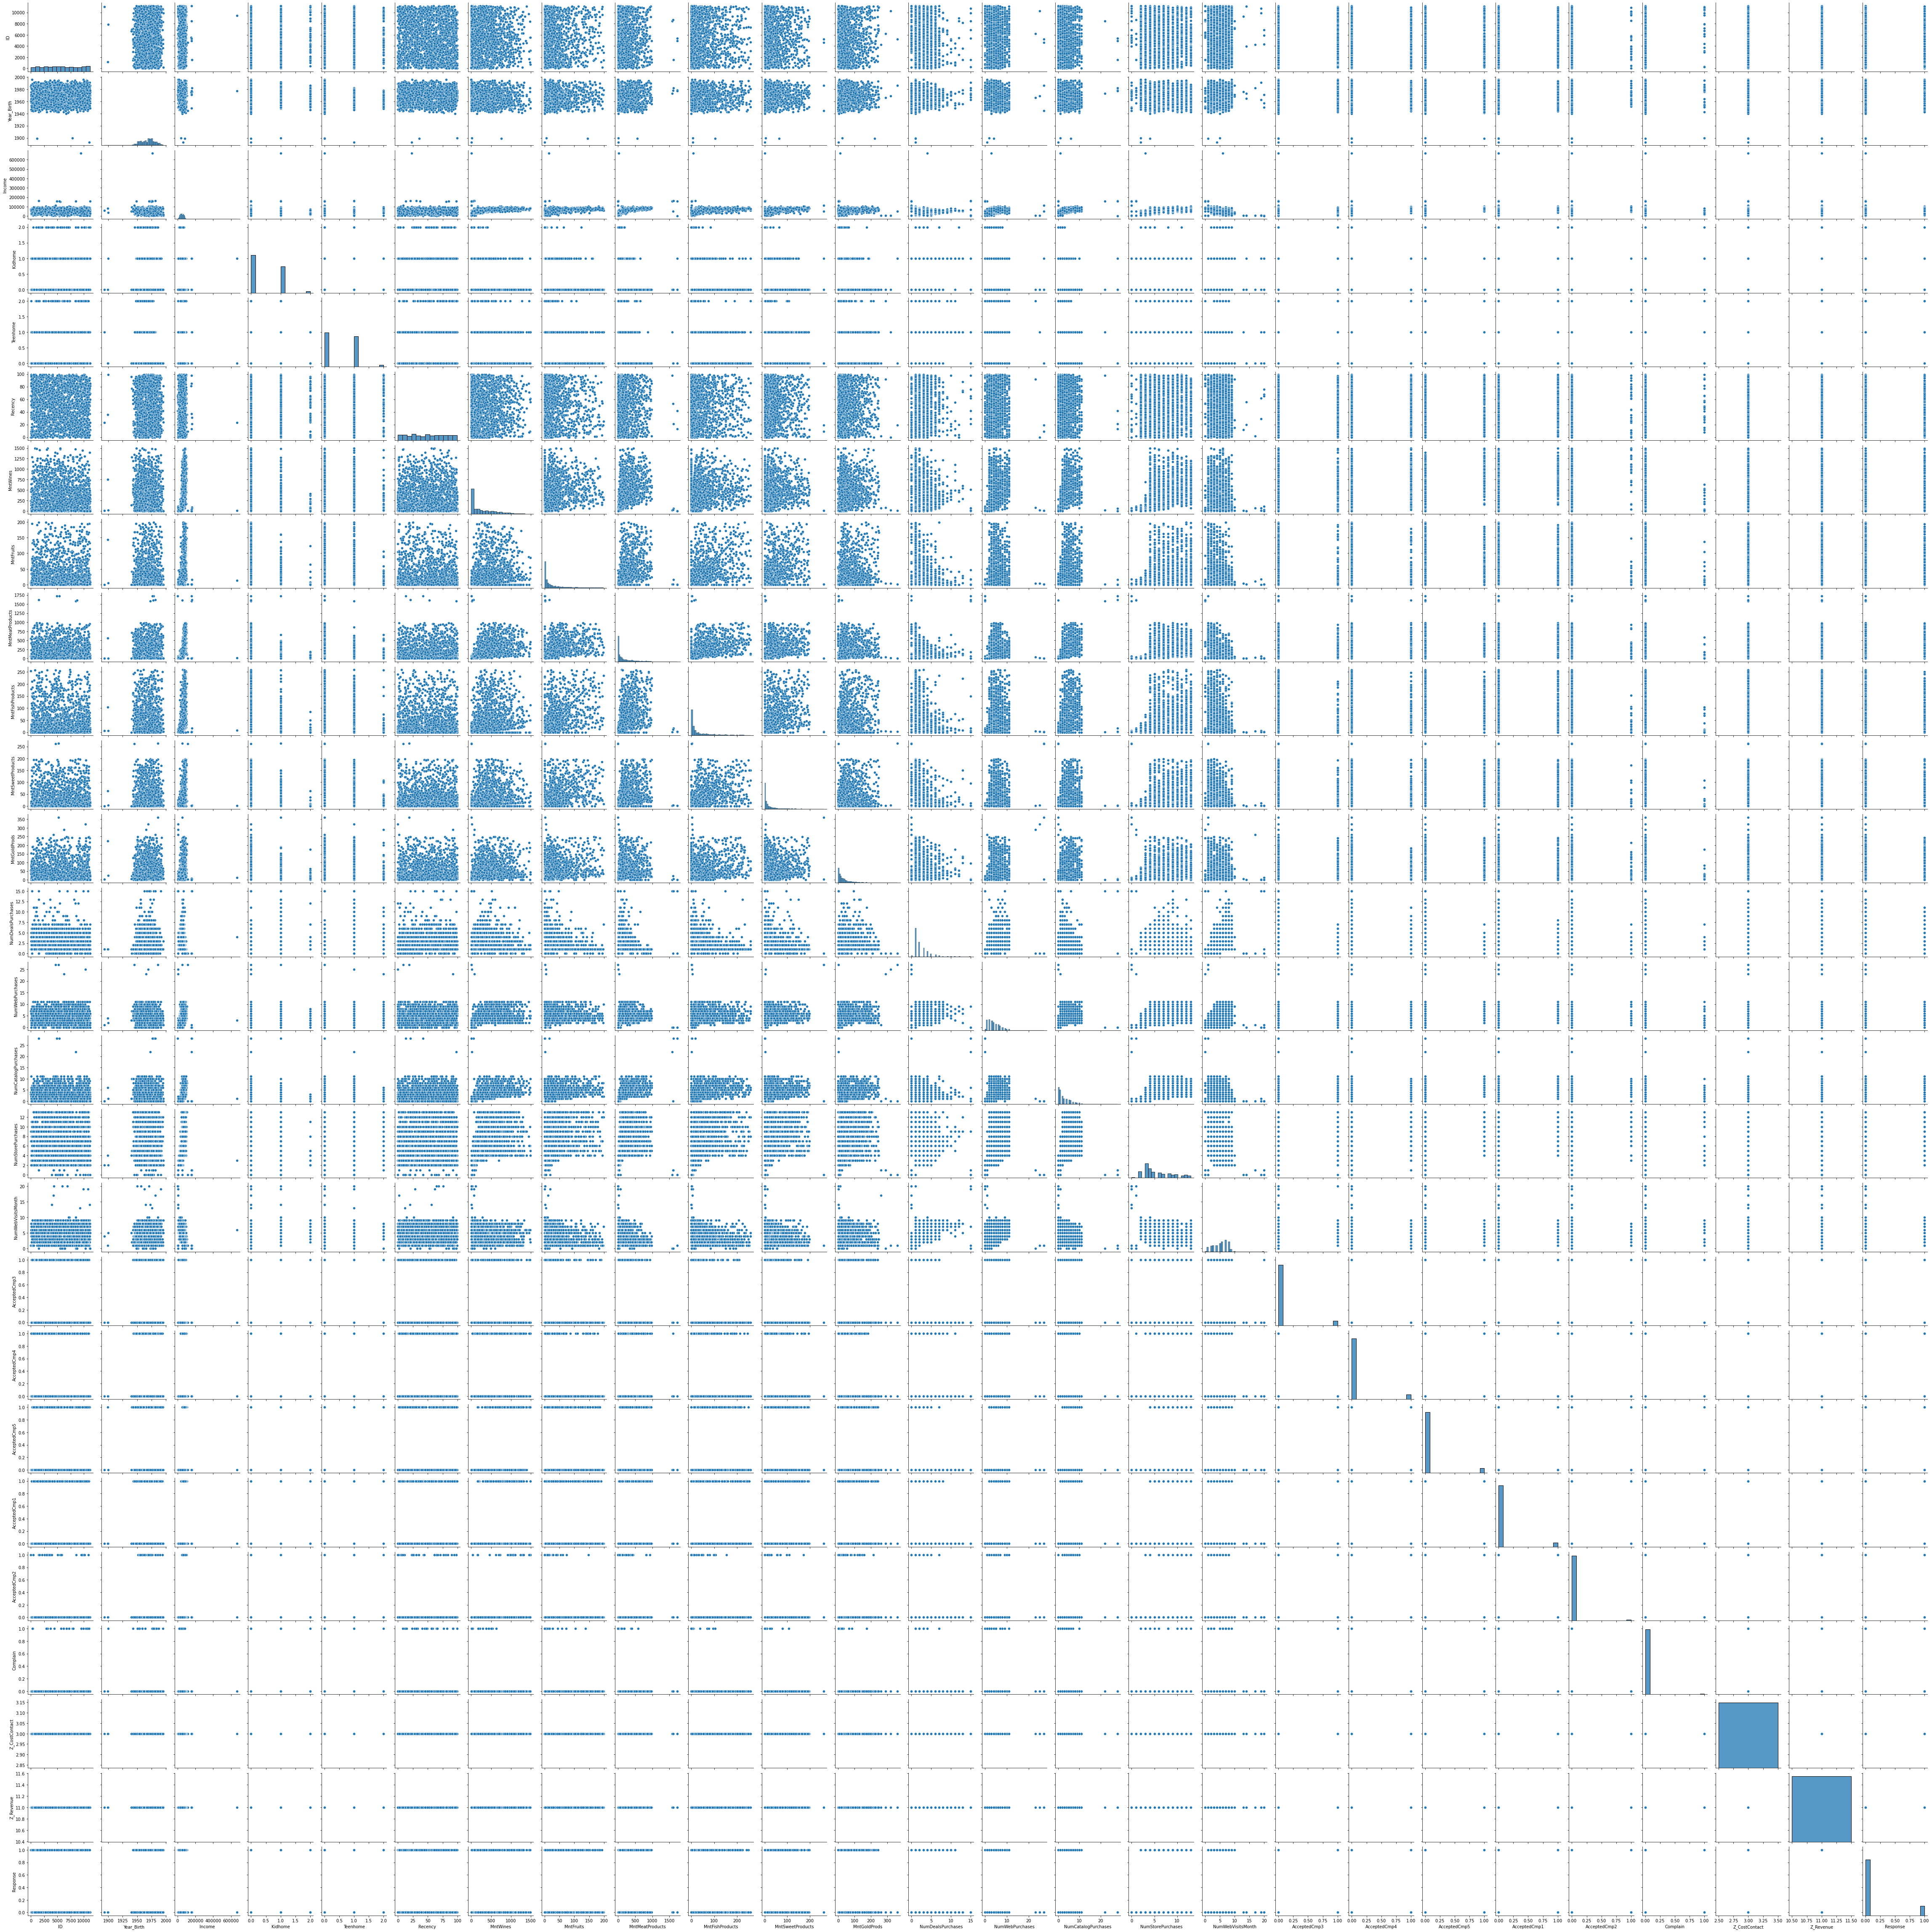

In [23]:
sns.pairplot(df_num)

In [24]:
corr = df.corr(method='pearson')
corr

ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.012996  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.160899  0.230176 -0.352111   
Income               0.012996   -0.160899  1.000000 -0.425326  0.018965   
Kidhome              0.002406    0.230176 -0.425326  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.018965 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.004061  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.576903 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.428791 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.577805 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.437564 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.436131 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.321938 -0.349595 -0.021725   
NumDealsPurchases   -0.037166   -0.060846 -0.082315  0.221798  0.387741   
NumWebPurchases     -0.018924   -0.145040  0.380554 -0.361647  0.155500   
NumCatalogPurchases -0.003440   -0.121275  0.586826 -0.502237 -0.110769   
NumStorePurchases   -0.014927   -0.128272  0.526600 -0.499683  0.050695   
NumWebVisitsMonth   -0.007446    0.121139 -0.549785  0.447846  0.134884   
AcceptedCmp3        -0.036040    0.061774 -0.016064  0.014674 -0.042677   
AcceptedCmp4        -0.025387   -0.060510  0.182718 -0.161600  0.038886   
AcceptedCmp5        -0.007517    0.007123  0.334893 -0.205634 -0.191050   
AcceptedCmp1        -0.021614   -0.005930  0.274891 -0.172339 -0.140090   
AcceptedCmp2        -0.015061   -0.006539  0.087581 -0.081716 -0.015605   
Complain             0.033883   -0.030128 -0.027187  0.040207  0.003138   
Z_CostContact             NaN         NaN       NaN       NaN       NaN   
Z_Revenue                 NaN         NaN       NaN       NaN       NaN   
Response            -0.021968    0.021325  0.132867 -0.080008 -0.154446   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.046524 -0.022878   0.004600        -0.004437   
Year_Birth          -0.019871 -0.157773  -0.017917        -0.030872   
Income              -0.004061  0.576903   0.428791         0.577805   
Kidhome              0.008827 -0.496297  -0.372581        -0.437129   
Teenhome             0.016198  0.004846  -0.176764        -0.261160   
Recency              1.000000  0.016064  -0.004306         0.023056   
MntWines             0.016064  1.000000   0.389637         0.562667   
MntFruits           -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts      0.023056  0.562667   0.543105         1.000000   
MntFishProducts      0.001079  0.399753   0.594804         0.568402   
MntSweetProducts     0.022670  0.386581   0.567164         0.523846   
MntGoldProds         0.016693  0.387516   0.392995         0.350609   
NumDealsPurchases   -0.001098  0.010940  -0.132114        -0.122415   
NumWebPurchases     -0.010726  0.542265   0.296735         0.293761   
NumCatalogPurchases  0.025110  0.635226   0.487917         0.723827   
NumStorePurchases    0.000799  0.642100   0.461758         0.479659   
NumWebVisitsMonth   -0.021445 -0.320653  -0.418383        -0.539470   
AcceptedCmp3        -0.032991  0.062202   0.014727         0.018272   
AcceptedCmp4         0.018826  0.373286   0.010152         0.102912   
AcceptedCmp5         0.000129  0.472613   0.215833         0.373769   
AcceptedCmp1        -0.019283  0.354133   0.194748         0.309761   
AcceptedCmp2        -0.001781  0.205907  -0.009773         0.043033   
Complain             0.013231 -0.039007  -0.005166        -0.023483   
Z_CostContact             NaN       NaN        NaN              NaN   
Z_Revenue                 NaN       NaN        NaN              NaN   
Response            -0.198437  0.247254   0.125289         0.236335   

                     MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
ID   

<AxesSubplot:>

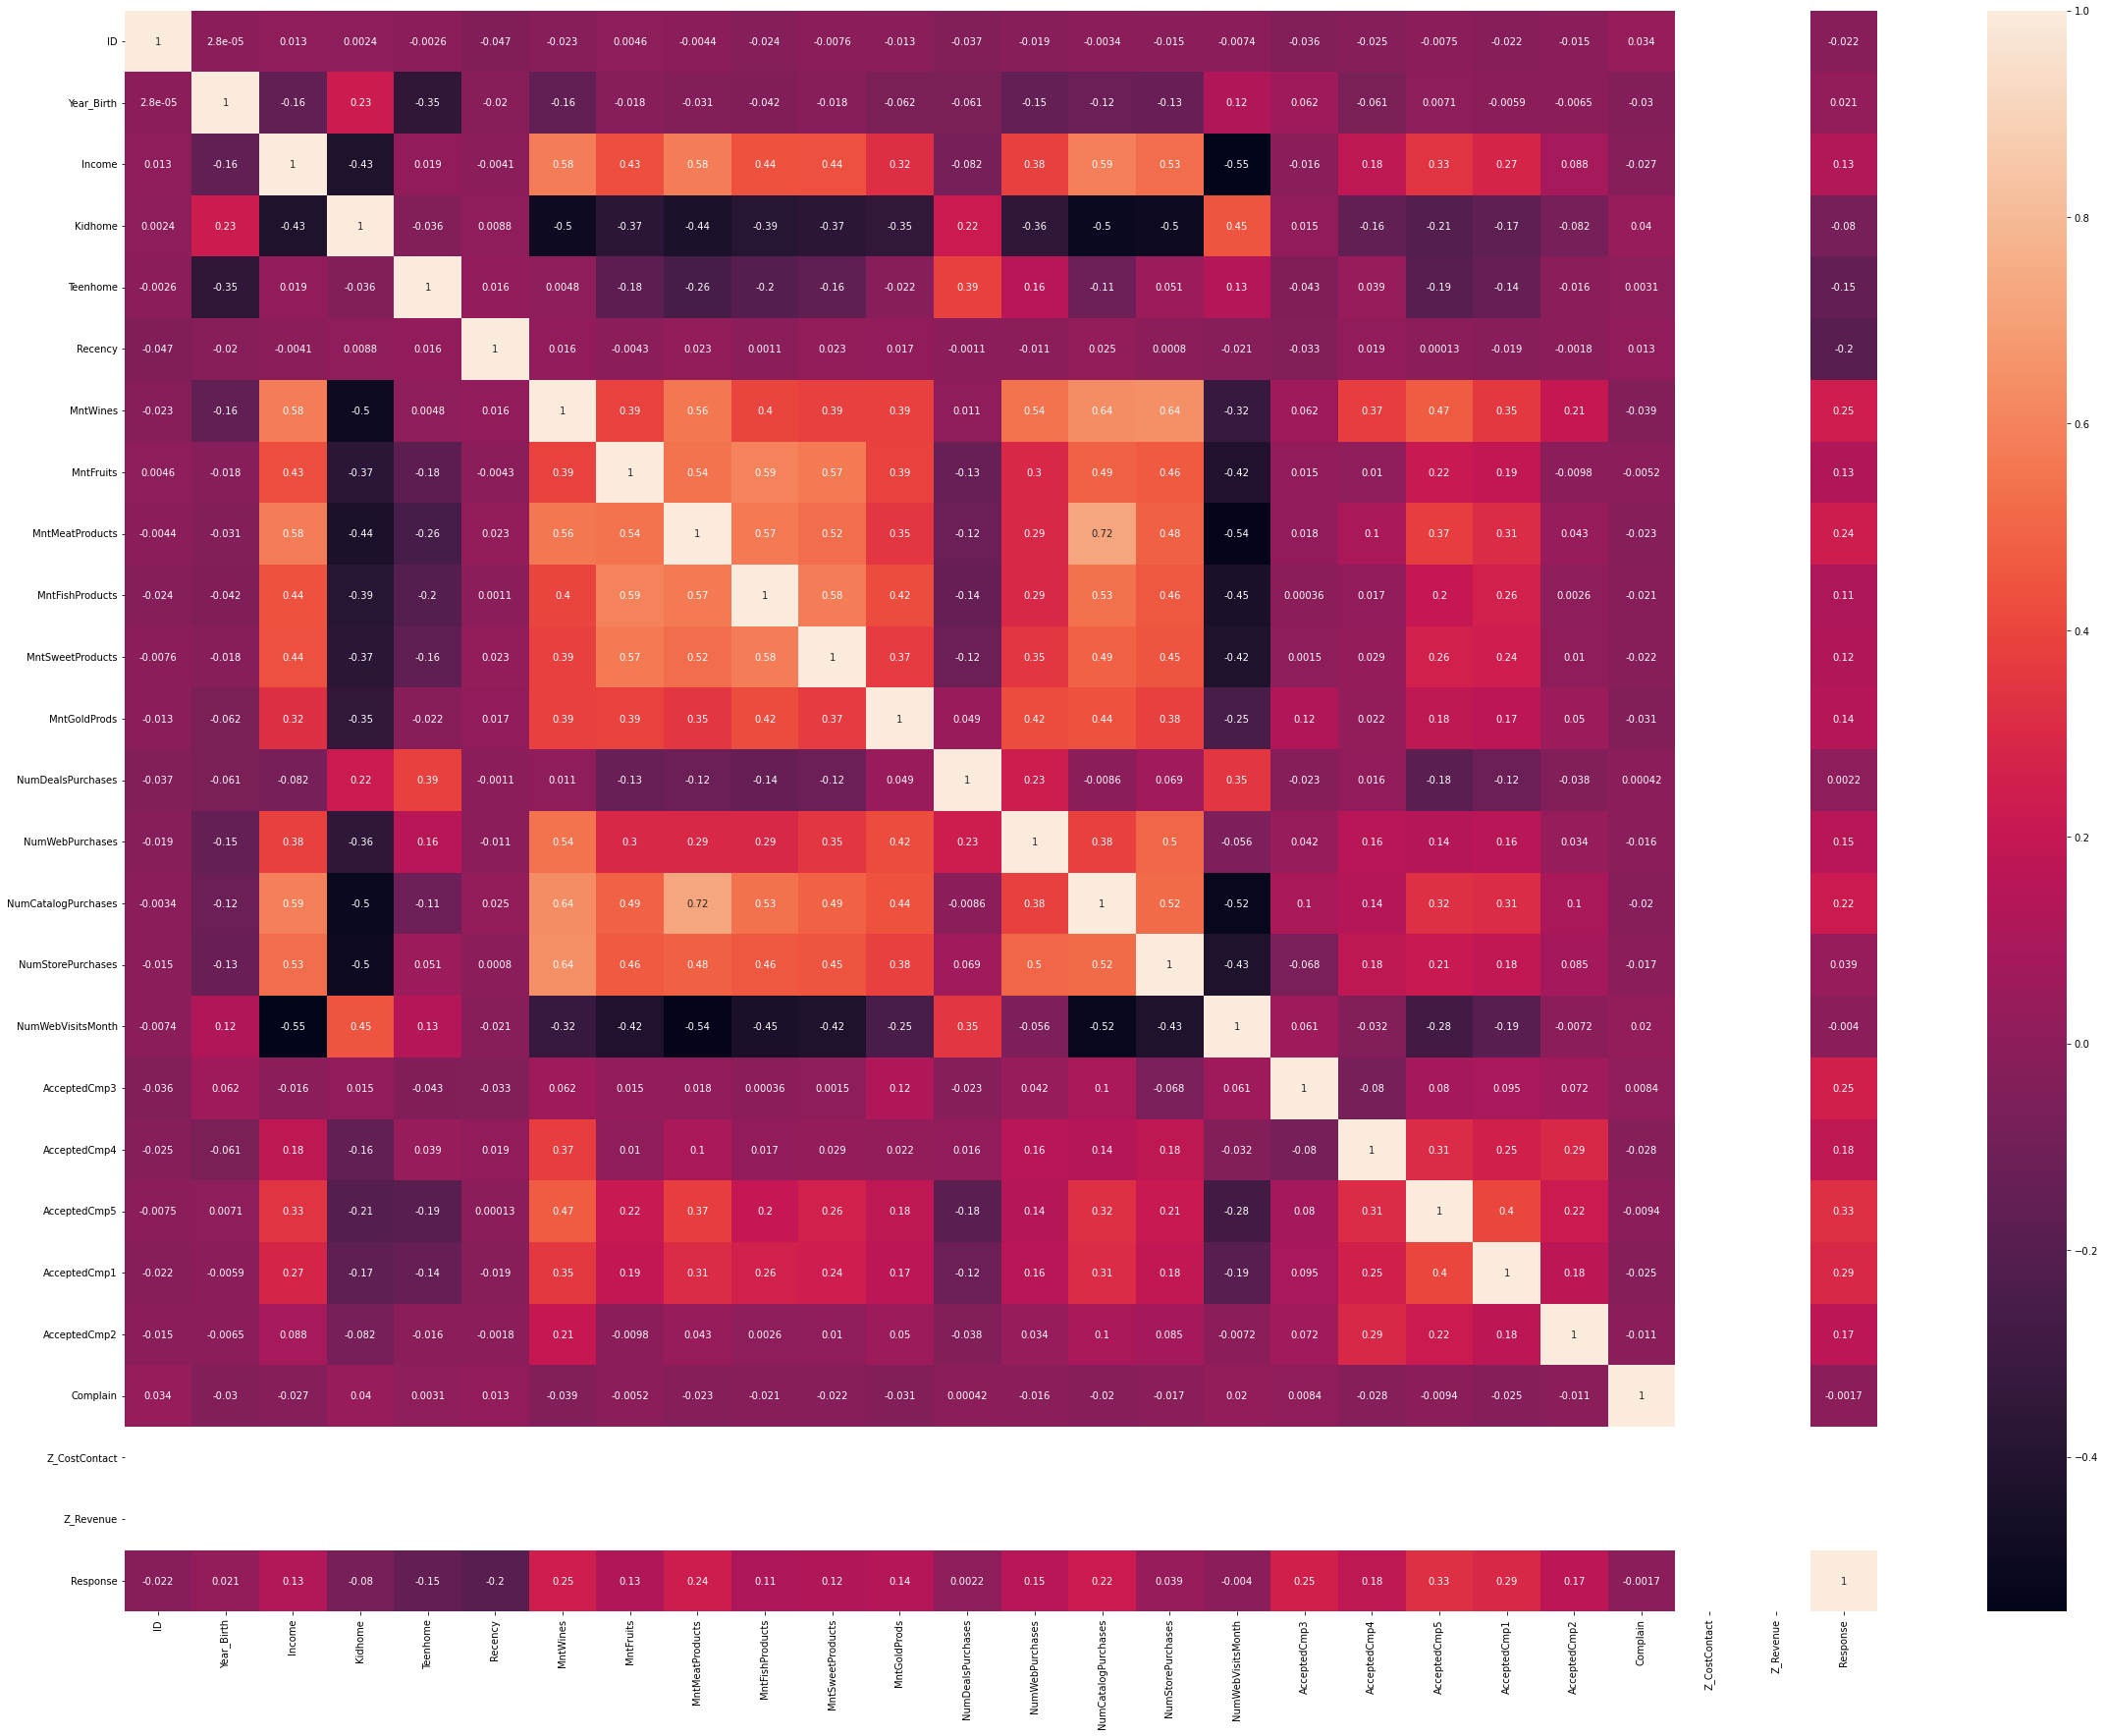

In [25]:
# Create heatmap for the correlation
plt.subplots(figsize=(40,30))
sns.heatmap(corr,data=df, annot=True)

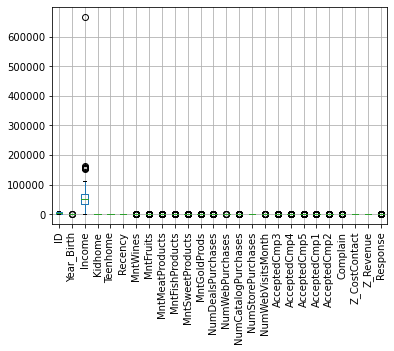

In [26]:
df[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

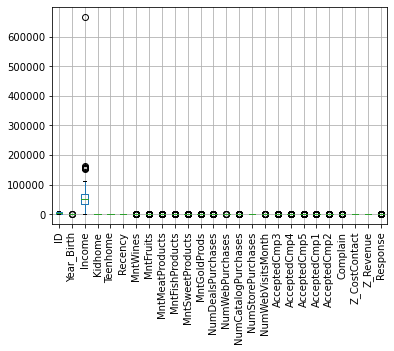

In [27]:
df[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
df[cat_list]=df[cat_list].apply(le.fit_transform)

In [31]:
x=df.drop(columns='Response')
y=df['Response']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30,random_state=102)

In [33]:
Y_train.head(30)

1861    0
251     0
165     0
718     0
1495    0
734     0
1253    0
881     0
374     1
993     0
1396    0
908     0
780     0
1029    0
966     1
842     0
875     0
349     0
1097    0
1243    0
1979    1
506     0
110     0
1365    1
1328    0
1311    0
585     0
607     0
828     0
1191    1
Name: Response, dtype: int64

In [34]:
clf=DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [35]:
from sklearn import tree

train_char_lable=['No','Yes']
ld_Tree_File=open('ld_Tree_File.dot','w')
dot_data=tree.export_graphviz(clf,out_file=ld_Tree_File, feature_names=list(X_train),class_names=list(train_char_lable))
ld_Tree_File.close()

In [36]:
Y_pred_train= clf.predict(X_train)
Y_pred_test= clf.predict(X_test)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


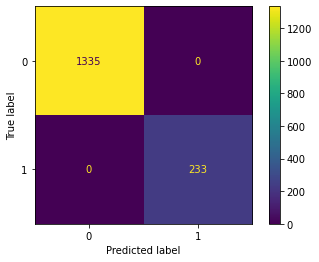

In [37]:
plot_confusion_matrix(clf,X_train,Y_train)

In [38]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1335
           1       1.00      1.00      1.00       233

    accuracy                           1.00      1568
   macro avg       1.00      1.00      1.00      1568
weighted avg       1.00      1.00      1.00      1568



C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


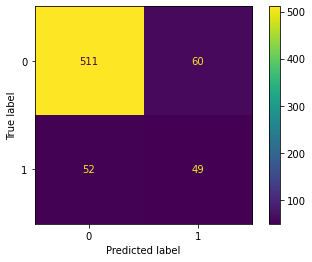

In [39]:
plot_confusion_matrix(clf,X_test,Y_test)

In [40]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1335
           1       1.00      1.00      1.00       233

    accuracy                           1.00      1568
   macro avg       1.00      1.00      1.00      1568
weighted avg       1.00      1.00      1.00      1568



In [41]:
clf=DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

In [42]:
from sklearn import tree

train_char_lable=['No','Yes']
ld_Tree_File=open('ld_Tree_File1.dot','w')
dot_data=tree.export_graphviz(clf,out_file=ld_Tree_File, feature_names=list(X_train),class_names=list(train_char_lable))
ld_Tree_File.close()

In [43]:
Y_pred_train= clf.predict(X_train)
Y_pred_test= clf.predict(X_test)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


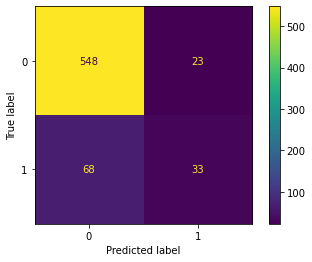

In [44]:
plot_confusion_matrix(clf,X_test,Y_test)

In [45]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1335
           1       0.84      0.37      0.52       233

    accuracy                           0.90      1568
   macro avg       0.87      0.68      0.73      1568
weighted avg       0.89      0.90      0.88      1568



In [46]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       571
           1       0.59      0.33      0.42       101

    accuracy                           0.86       672
   macro avg       0.74      0.64      0.67       672
weighted avg       0.84      0.86      0.85       672



In [47]:
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [48]:
Y_pred_train= clf.predict(X_train)
Y_pred_test= clf.predict(X_test)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


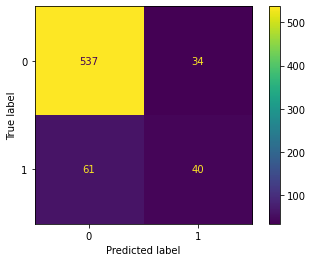

In [49]:
plot_confusion_matrix(clf,X_test,Y_test)

In [50]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1335
           1       0.78      0.52      0.62       233

    accuracy                           0.91      1568
   macro avg       0.85      0.75      0.78      1568
weighted avg       0.90      0.91      0.90      1568



In [51]:
clf=DecisionTreeClassifier(max_depth=4, min_samples_leaf=19, min_samples_split=26)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=19, min_samples_split=26)

In [52]:
Y_pred_train= clf.predict(X_train)
Y_pred_test= clf.predict(X_test)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


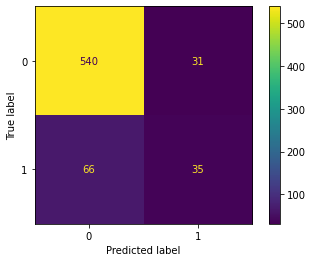

In [53]:
plot_confusion_matrix(clf,X_test,Y_test)

In [54]:
clf=DecisionTreeClassifier(max_depth=99, min_samples_leaf=99, min_samples_split=99)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=99, min_samples_leaf=99, min_samples_split=99)

In [55]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1335
           1       0.72      0.41      0.52       233

    accuracy                           0.89      1568
   macro avg       0.81      0.69      0.73      1568
weighted avg       0.88      0.89      0.88      1568



C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


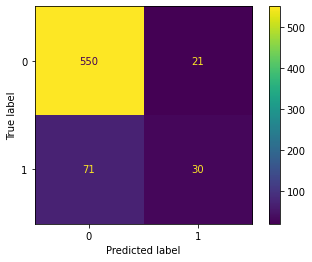

In [56]:
plot_confusion_matrix(clf,X_test,Y_test)

Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc=RandomForestClassifier(n_estimators=101, random_state=42)

In [59]:
rfc1=RandomForestClassifier(n_estimators=201, random_state=42, oob_score=True)

In [60]:
rfc1.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=201, oob_score=True, random_state=42)

In [61]:
rfc1.oob_score_

0.8845663265306123

In [62]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=101, random_state=42)

In [63]:
Y_pred_train_rfc=rfc.predict(X_train)
Y_pred_test_rfc=rfc.predict(X_test)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


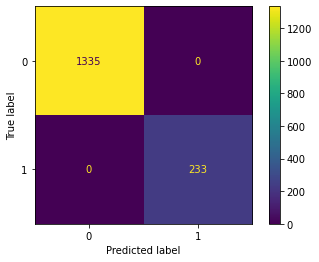

In [64]:
plot_confusion_matrix(rfc, X_train, Y_train)

In [65]:
print(classification_report(Y_train,Y_pred_train_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1335
           1       1.00      1.00      1.00       233

    accuracy                           1.00      1568
   macro avg       1.00      1.00      1.00      1568
weighted avg       1.00      1.00      1.00      1568



C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


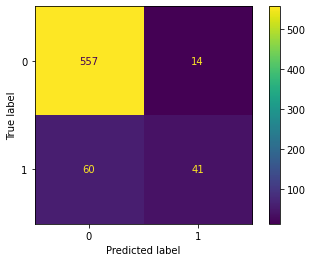

In [66]:
plot_confusion_matrix(rfc,X_test,Y_test)

In [67]:
print(classification_report(Y_test,Y_pred_test_rfc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       571
           1       0.75      0.41      0.53       101

    accuracy                           0.89       672
   macro avg       0.82      0.69      0.73       672
weighted avg       0.88      0.89      0.88       672



In [68]:
rfc1=RandomForestClassifier(n_estimators=101, max_depth=8, max_features=6, min_samples_leaf=16, min_samples_split=60, random_state=123)

In [69]:
rfc1.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_leaf=16,
                       min_samples_split=60, n_estimators=101,
                       random_state=123)

In [70]:
Y_pred_train_rfc1=rfc1.predict(X_train)

In [71]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':[8,9,10],
    'max_features':[5,6],
    'min_samples_leaf':[14,16,18],
    'min_samples_split':[45,50,60,70],
    'n_estimators':[101,201]
}
rfc1=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rfc1, param_grid=param_grid,cv=5)

In [72]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [5, 6],
                         'min_samples_leaf': [14, 16, 18],
                         'min_samples_split': [45, 50, 60, 70],
                         'n_estimators': [101, 201]})

In [73]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 18,
 'min_samples_split': 50,
 'n_estimators': 201}

In [74]:
best_model=grid_search.best_estimator_

In [75]:
Y_pred_train_rfc2=best_model.predict(X_train)
Y_pred_test_rfc2=best_model.predict(X_test)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


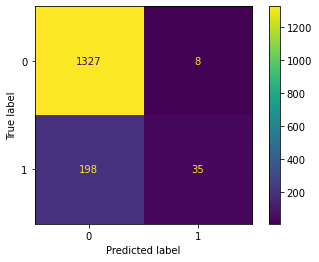

In [76]:
plot_confusion_matrix(best_model, X_train, Y_train)

In [77]:
print(classification_report(Y_train, Y_pred_train_rfc2))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1335
           1       0.81      0.15      0.25       233

    accuracy                           0.87      1568
   macro avg       0.84      0.57      0.59      1568
weighted avg       0.86      0.87      0.83      1568



C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


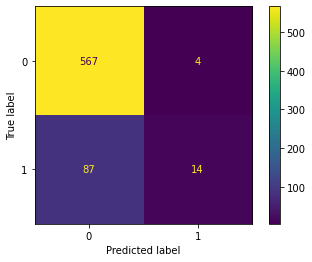

In [78]:
plot_confusion_matrix(best_model, X_test, Y_test)

In [79]:
print(classification_report(Y_test, Y_pred_test_rfc2))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       571
           1       0.78      0.14      0.24       101

    accuracy                           0.86       672
   macro avg       0.82      0.57      0.58       672
weighted avg       0.85      0.86      0.82       672

